## IF4091 Pembelajaran Mesin
## Tugas Besar I: Algoritma Clustering

**Anggota Kelompok**
- **13515021 - Dewita Sonya T**
- **13515057 - Erick Wijaya**
- **13515063 - Kezia Suhendra**

**Kelas: K01**


# Import Statements

In [12]:
from sklearn import datasets
from sklearn.decomposition import PCA
from klusterpy.cluster.agglomerative import AgglomerativeClustering
from klusterpy.cluster.dbscan import DBSCAN
from klusterpy.cluster.kmeans import KMeans
from klusterpy.cluster.kmedoids import KMedoids

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# Load Datasets

In [16]:
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris_data['data']], columns= iris_data['feature_names'])
iris_label = iris_data['target']

iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


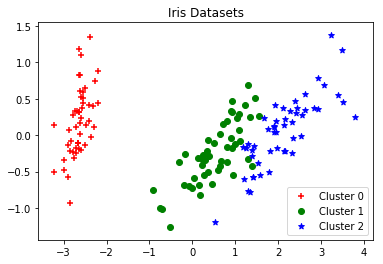

In [31]:
def plot_initial(df, title):
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    unique_labels = list(set(iris_label))
    colors = ['r', 'g', 'b']
    markers = ['+', 'o', '*']
    clusters = [None] * len(unique_labels)
    for i in range(0, pca_2d.shape[0]):
        idx = unique_labels.index(iris_label[i])
        clusters[idx] = pl.scatter(pca_2d[i,0], pca_2d[i,1], c=colors[idx], marker=markers[idx])
    legends = []
    for i, cluster in enumerate(clusters):
        if cluster != None:
            legends.append('Cluster ' + str(i))
    pl.legend(clusters, legends)
    pl.title(title)
    pl.show()

plot_initial(iris_df, "Iris Datasets")

# Model Training

In [18]:
def plot_cluster(df, model_labels, title):
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    unique_labels = list(set(model_labels))
    colors = ['r', 'g', 'b']
    markers = ['+', 'o', '*']
    clusters = [None] * len(unique_labels)
    for i in range(0, pca_2d.shape[0]):
        idx = unique_labels.index(model_labels[i])
        clusters[idx] = pl.scatter(pca_2d[i,0], pca_2d[i,1], c=colors[idx], marker=markers[idx])
    legends = []
    for i, cluster in enumerate(clusters):
        if cluster != None:
            legends.append('Cluster ' + str(i))
    pl.legend(clusters, legends)
    pl.title(title)
    pl.show()
    
def plot_cluster_dbscan(df, model_labels, title): # assuming not more than 4 clusters (including outlier)
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    unique_labels = list(set(model_labels))
    colors = ['r', 'g', 'b', 'k']
    markers = ['+', 'o', '*', 'v']
    clusters = [None] * len(unique_labels)
    is_core = [True] * len(unique_labels)
    for i in range(0, pca_2d.shape[0]):
        idx = unique_labels.index(model_labels[i])
        is_core[idx] = model_labels[i] != -1
        clusters[idx] = pl.scatter(pca_2d[i,0], pca_2d[i,1], c=colors[idx], marker=markers[idx])
    legends = []
    for i, cluster in enumerate(clusters):
        if cluster != None:
            if is_core[i]:
                legends.append('Cluster ' + str(i))
            else:
                legends.append('Outlier')
    pl.legend(clusters, legends)
    pl.title(title)
    pl.show()

## 1. Agglomerative Hierarchical

### a. Single Linkage

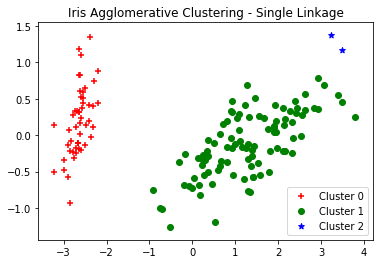

In [19]:
single = AgglomerativeClustering(n_clusters=3).fit(iris_df.values)
plot_cluster(iris_df, single.labels, "Iris Agglomerative Clustering - Single Linkage")

### b. Complete Linkage

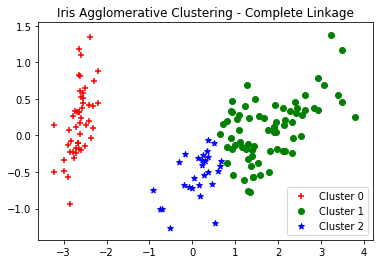

In [20]:
complete = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(iris_df.values)
plot_cluster(iris_df, complete.labels, "Iris Agglomerative Clustering - Complete Linkage")

### c. Average Linkage

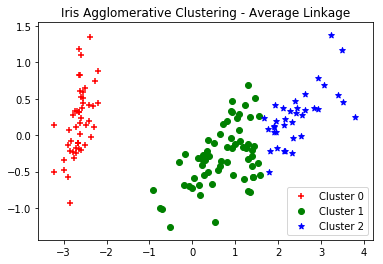

In [21]:
average = AgglomerativeClustering(n_clusters=3, linkage='average').fit(iris_df.values)
plot_cluster(iris_df, average.labels, "Iris Agglomerative Clustering - Average Linkage")

### d. Average Group Linkage

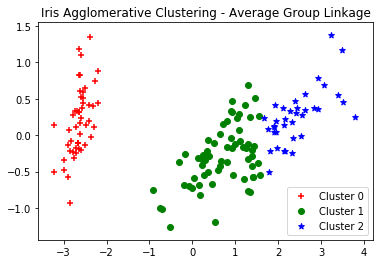

In [22]:
average_group = AgglomerativeClustering(n_clusters=3, linkage='average group').fit(iris_df.values)
plot_cluster(iris_df, average_group.labels, "Iris Agglomerative Clustering - Average Group Linkage")

## 2. DBSCAN

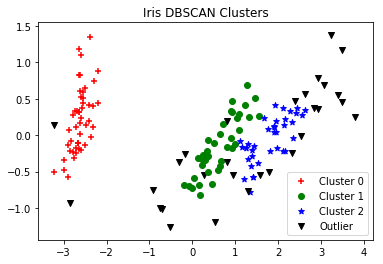

In [23]:
dbscan = DBSCAN(epsilon=0.42, min_pts=5).fit(iris_df.values)
plot_cluster_dbscan(iris_df, dbscan.labels, "Iris DBSCAN Clusters")

## 3. K-Means

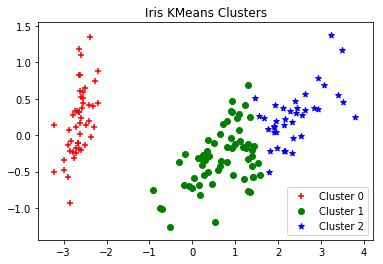

In [24]:
kmeans_init_centroids = np.array([iris_df.values[24], iris_df.values[74], iris_df.values[124]])
kmeans = KMeans(n_clusters=3, init=kmeans_init_centroids).fit(iris_df.values)
plot_cluster(iris_df, kmeans.labels, "Iris KMeans Clusters")

## 4. K-Medoids

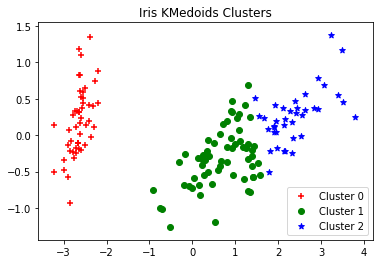

In [25]:
kmedoids_init_medoids = [24, 74, 124]
kmedoids_labels = KMedoids(n_cluster=3, init=kmedoids_init_medoids).fit_predict(iris_df.values)
plot_cluster(iris_df, kmedoids_labels, "Iris KMedoids Clusters")

# Evaluasi

Evaluasi dilakukan dengan purity.

In [58]:
def get_purity(cluster, label, n_cluster):
    conf = [[0 for _ in range(n_cluster)] for _ in range(n_cluster + 10)]
    n = len(cluster)
    for i in range(n):
        if label[i] >= 0:
            conf[label[i]][cluster[i]] += 1
        
    purity = 0
    for i in range(n_cluster + 10):
        maks = 0
        for j in range(n_cluster):
            maks = max(maks, conf[i][j])
        purity += maks
    
    return purity / n

## 1. Agglomerative Hierarchical

### a. Single Linkage

In [59]:
get_purity(iris_label, single.labels, 3)

0.68

### b. Complete Linkage

In [60]:
get_purity(iris_label, complete.labels, 3)

0.84

### c. Average Linkage

In [61]:
get_purity(iris_label, average.labels, 3)

0.9066666666666666

### d. Average Group Linkage

In [62]:
get_purity(iris_label, average_group.labels, 3)

0.9066666666666666

## 2. DBSCAN

In [63]:
get_purity(iris_label, dbscan.labels, 3)

0.7866666666666666

## 3. K-Means

In [64]:
get_purity(iris_label, kmeans.labels, 3)

0.8933333333333333

## 4. K-Medoids

In [65]:
get_purity(iris_label, kmedoids_labels, 3)

0.8933333333333333